### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### importing the data set

In [3]:
housing_data_set=pd.read_csv(r'BostonHousing.csv')

In [4]:
housing_data_set.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
housing_data_set.shape

(506, 14)

### correlation

<AxesSubplot:>

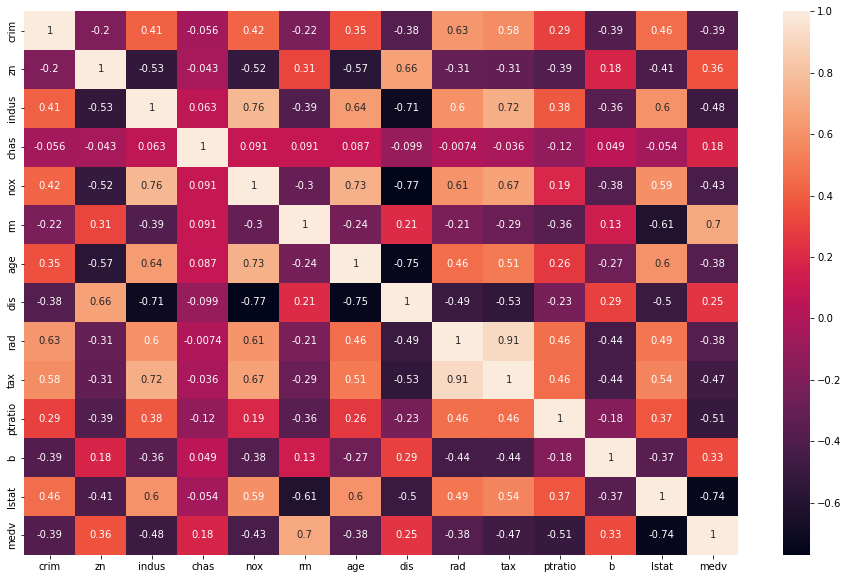

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(housing_data_set.corr(),annot=True)

#### The output aboves that the MEDV column has the highest positive correlation of 0.7 ith the RM column (average number of rooms per dwelling), which makes sense since houses with more rooms tend to have higher prices. On the other hand, the MEDV column has the highest negative correlation with the LSTATE column, which corresponds to the lower status of the population, which again makes sense since towns with a large ratio lower status population should have cheaper houses.

### dividing the data into features and labels

In [15]:
X=housing_data_set.drop(['medv'],axis=1)

In [16]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [13]:
y=housing_data_set.filter(['medv'],axis=1)

In [14]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### divide the data into training and test data set

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### training linear regression algorithm

In [19]:
house_predictor=LinearRegression()
house_predictor.fit(X_train,y_train)
y_pred=house_predictor.predict(X_test)

### Evaluating performance of a training model

In [20]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  3.1890919658878745
Mean Squared Error:  24.29111947497371
Root Mean Square Error:  4.928602182665355


#### The MAE value of 3.18 shows that, on average, there is an error of 3.18 dollars between the actual and predicted values for the MEDV column.

In [22]:
comparison_df=pd.DataFrame({"Actual":y_test.values.tolist(),"predicted":y_pred.tolist()})

In [23]:
comparison_df

,Actual,predicted
0,[23.6],[28.99672361982493]
1,[32.4],[36.02556533567232]
2,[13.6],[14.816944045388338]
3,[22.8],[25.031979150399636]
4,[16.1],[18.76987991524812]
...,...,...
97,[17.9],[-0.16423699568661476]
98,[9.6],[13.684866815285798]
99,[17.2],[16.183596971713403]
100,[22.5],[22.276219993533452]


### making predictions on a single data point

In [24]:
singlepoint=X_test.values[1].reshape(1,-1)

In [25]:
house_predictor.predict(singlepoint)

array([[36.02556534]])

In [26]:
y_test.values[1]

array([32.4])

#### The actual value is 32 thousand, which means that our prediction has an error of an estimated 4 thousand